In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import math
from sklearn.model_selection import train_test_split

# Display preferences.
%matplotlib inline


In [2]:
#load the data
customers = pd.read_csv('customers_data.csv')
customers.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [3]:
customers.shape

(120000, 7)

I wanted to learn about the factors that affect whether a website customer joins the loyalty program. I used logistic regression because it is very good with binary outcomes, and it is not prone to overfitting. Also, you can learn about the factors affecting the outcome by looking at the coefficients of the equation.

In [4]:
#create binary variables
customers2 = pd.get_dummies(customers)
customers2.head()

,Unnamed: 0,purch_amt,age,days_since_last_purch,loyalty,gender_female,gender_male,card_on_file_no,card_on_file_yes
0,0,19.58,31.0,35.0,False,0,1,1,0
1,1,65.16,23.0,61.0,False,0,1,0,1
2,2,40.60,36.0,49.0,False,1,0,1,0
3,3,38.01,47.0,57.0,False,0,1,0,1
4,4,22.32,5.0,39.0,False,1,0,0,1


In [5]:
customers2 = customers2.drop(columns = ['Unnamed: 0','card_on_file_no','gender_male'])
customers2.head()

,purch_amt,age,days_since_last_purch,loyalty,gender_female,card_on_file_yes
0,19.58,31.0,35.0,False,0,0
1,65.16,23.0,61.0,False,0,1
2,40.60,36.0,49.0,False,1,0
3,38.01,47.0,57.0,False,0,1
4,22.32,5.0,39.0,False,1,1


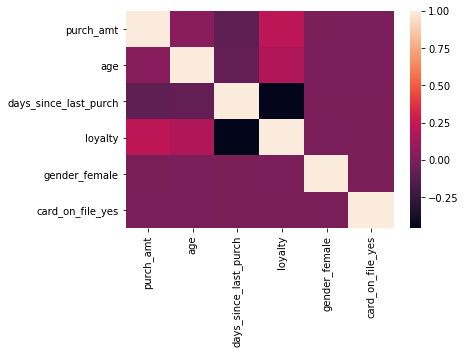

In [6]:
# look at correlations between variables and outcome
sns.heatmap(customers2.corr())  

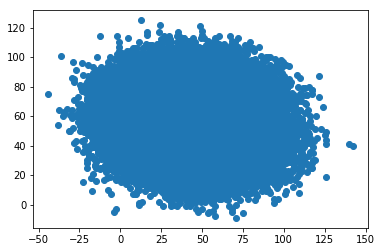

In [7]:
#no linear relationship here
plt.scatter(customers2['purch_amt'],customers2['days_since_last_purch'])

In [8]:
#prepare for model
customers3 = customers2.drop(columns = ['loyalty'])
customers3.head()

,purch_amt,age,days_since_last_purch,gender_female,card_on_file_yes
0,19.58,31.0,35.0,0,0
1,65.16,23.0,61.0,0,1
2,40.60,36.0,49.0,1,0
3,38.01,47.0,57.0,0,1
4,22.32,5.0,39.0,1,1


In [14]:
#model using logistic regression and check accuracy
lr = LogisticRegression(C=.01)
y = customers2['loyalty']
X = customers3

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)
##Fit the model.
fit = lr.fit(X_train, Y_train)

# Display.
#logistic regression output
print('Coefficients') 
print(fit.coef_)
print('Intercepts')
print (fit.intercept_)
pred_y_sklearnt = lr.predict(X_test)
pred_y_sklearn = lr.predict(X_train)
print('\n Percentage accuracy')
print('Test',lr.score(X_test, Y_test))
print('Train',lr.score(X_train, Y_train))
print('Predicted,Real')
print(pd.crosstab(pred_y_sklearn, Y_train))


Coefficients
[[ 0.03077477  0.05020095 -0.09832281  0.0176193   0.01128964]]
Intercepts
[0.3914517]

 Percentage accuracy
Test 0.86875
Train 0.8691145833333334
Predicted,Real
loyalty  False  True 
row_0                
False    76859   9448
True      3117   6576


A heatmap shows that there are no strong correlations between x variables. The strongest correlations are between loyalty and days since last purchase, loyalty and age, and loyalty and purchase amount. These correlations support model results.
The model results for the train set show an accuracy of 0.869, which is the same as the test set (after rounding). The model is not overfit and it has a good accuracy. The confusion matrix shows that the model error tended toward false negatives. The final coefficients show that the three most important variables to determine whether a customer will join the loyalty program are days since last purchase, purchase amount and age. More days since last purchase make it less likely that a customer will join the loyalty program, while increased purchase amount, and increased age make it more likely that a customer will join the loyalty program. According to the logistic regression formula, ln(p/(1­p)) = b+bx, for a 10 day increase in the days since last purchase, the odds ratio for a customer joining the loyalty program decreases about 2.7 times. For every 20 year increase in age the the odds ratio for a customer joining the loyalty program
 increases about 2.7 times. For every 33 dollar increase in purchase amount the odds ratio for a customer joining the loyalty program increases about 2.7 times.
